<a href="https://colab.research.google.com/github/karanm21/matplotlib_tutorial/blob/master/Real_world_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q tensorflow tensorflow-datasets

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## Find Datasets

## Get info on data:

In [ ]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview

tfds.list_builders()

In [6]:
builder= tfds.builder('rock_paper_scissors')
info= builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='~/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    

## Prepare Rock, paper, scissor data

In [7]:
ds_train= tfds.load(name="rock_paper_scissors", split='train')
ds_test= tfds.load(name="rock_paper_scissors", split='test')

Dataset rock_paper_scissors downloaded and prepared to ~/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


## show examples:

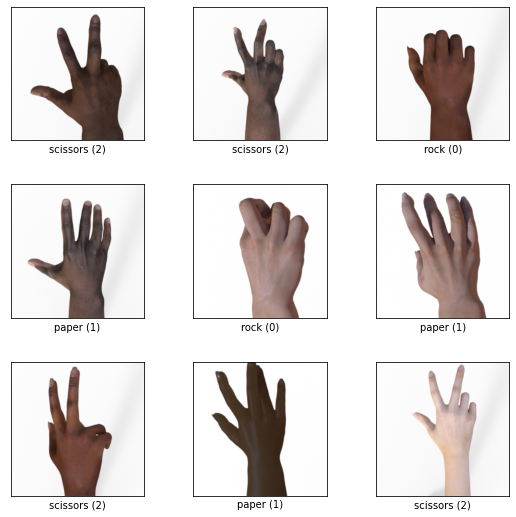

In [13]:
fig= tfds.show_examples(ds_train, info)

## Additional data prep

>converting tfds into numpy format as it is easy to use with. 

In [8]:
train_images= np.array([example['image'].numpy()[:,:,0] for example in ds_train])   # we are using only one color channel as we need only edges so it will reduce the amount of the data that the network has to learn.
train_labels= np.array([example['label'].numpy() for example in ds_train])

test_images= np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels= np.array([example['label'].numpy() for example in ds_test])

In [9]:
type(train_images[0])
train_images.shape
test_images.shape

(372, 300, 300)

In [10]:
train_images= train_images.reshape(2520,300,300,1)
test_images= test_images.reshape(372,300,300,1)

# 1 only signifies grayscale.

In [11]:
# Converting the data into float type and in range of 0-1 as it helps the network to learn efficiently and increase the performance.

train_images= train_images.astype('float32')
test_images= test_images.astype('float32')

train_images /=255
test_images /=255

## Train a network (basic approach):

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(),                        # coverts the dimension into simpler forms.
    keras.layers.Dense(512 , activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 4s 17ms/step - loss: 29.7061 - accuracy: 0.4190
Epoch 2/5
79/79 [==============================] - 1s 16ms/step - loss: 2.7194 - accuracy: 0.6056
Epoch 3/5
79/79 [==============================] - 1s 16ms/step - loss: 1.9008 - accuracy: 0.6631
Epoch 4/5
79/79 [==============================] - 1s 17ms/step - loss: 0.5512 - accuracy: 0.8341
Epoch 5/5
79/79 [==============================] - 1s 17ms/step - loss: 0.4352 - accuracy: 0.8567


In [19]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 7ms/step - loss: 2.6580 - accuracy: 0.4597


[2.6580302715301514, 0.45967742800712585]

## Train a Network (convolutional approach)

We are using this fully connected layer for these 300x300 images.
So we are basically connecting 90000 pixels to the next layer.

So we are giving more importance to these small pixels, thus overfitting 
our data.

So now we will be using the convolutional approach.

In [16]:
model= keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 22s 179ms/step - loss: 3.6611 - accuracy: 0.6730
Epoch 2/5
79/79 [==============================] - 13s 162ms/step - loss: 0.2694 - accuracy: 0.9329
Epoch 3/5
79/79 [==============================] - 13s 161ms/step - loss: 0.4172 - accuracy: 0.8833
Epoch 4/5
79/79 [==============================] - 13s 161ms/step - loss: 0.0334 - accuracy: 0.9913
Epoch 5/5
79/79 [==============================] - 13s 161ms/step - loss: 0.0081 - accuracy: 0.9988


In [17]:
model.evaluate(test_images, test_labels)   # here we are overfitting so we need to optimize it to become optimum.

12/12 [==============================] - 1s 104ms/step - loss: 1.5481 - accuracy: 0.5403


[1.5481394529342651, 0.5403226017951965]

## A better convolutional network:

> Dropout(0.5): One main issue is that we dont have many training examples. So, what dropout does that it will cut out 50% of the connections, so ultimately the epochs will be more effective because the data becomes more interesting as data gets dropped out randomly so each of the individual connections need to generalize more and be able to handle more variatons.

Thus, it will help us simulate having more training examples by using the dropout layer.


In [38]:
model= keras.Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)),           # averaging the pixels to reduce the input shape to (100,100).
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2),             # we dont want take too many dimensions, so does similar thing as averagePool but now we will pass over our output with 2x2 grids
                                             # and take the max pixel in every 2x2 grids.
    keras.layers.Dropout(0.5),    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),      # it is not recommended to just all pass all dropped out and flattened data to the classification layer. So, just add this layer.
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 3s 35ms/step - loss: 1.0238 - accuracy: 0.7143
Epoch 2/5
79/79 [==============================] - 3s 35ms/step - loss: 0.0713 - accuracy: 0.9821
Epoch 3/5
79/79 [==============================] - 3s 35ms/step - loss: 0.0270 - accuracy: 0.9921
Epoch 4/5
79/79 [==============================] - 3s 35ms/step - loss: 0.0379 - accuracy: 0.9937
Epoch 5/5
79/79 [==============================] - 3s 35ms/step - loss: 0.0099 - accuracy: 0.9972


In [40]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 17ms/step - loss: 0.9474 - accuracy: 0.7796


[0.9474096894264221, 0.7795698642730713]

## Hyperparameters Tuning:

In [ ]:
pip install -U keras-tuner

In [16]:
from kerastuner.tuners import RandomSearch

<ipython-input-16-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [18]:
def build_model(hp):
  model= keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)))

  # for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
  #   model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16, 32, 64]) , 3, activation='relu'))


  model.add(keras.layers.Conv2D(64 , 3, activation='relu'))
  model.add(keras.layers.Conv2D(32, 3, activation='relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))  # playing around here.

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
    directory= './new_directory'
    )

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)             # we need to pass in what we are trying to aptimize the network for.

Trial 5 Complete [00h 00m 47s]
val_accuracy: 0.7473118305206299

Best val_accuracy So Far: 0.7634408473968506
Total elapsed time: 00h 03m 26s


In [19]:
best_model= tuner.get_best_models()[0]    # 0th index means the top model.

In [20]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 15ms/step - loss: 0.6946 - accuracy: 0.7634


[0.6946113109588623, 0.7634408473968506]

In [21]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 99, 99, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 flatten (Flatten)           (None, 70688)             0

In [22]:
tuner.results_summary()

Results summary
Results in ./new_directory/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
Dense layer: 256
Score: 0.7634408473968506
Trial summary
Hyperparameters:
Dense layer: 512
Score: 0.7553763389587402
Trial summary
Hyperparameters:
Dense layer: 128
Score: 0.75
Trial summary
Hyperparameters:
Dense layer: 1024
Score: 0.7473118305206299
Trial summary
Hyperparameters:
Dense layer: 64
Score: 0.725806474685669


## Save and load our models:

In [ ]:
best_model.save('./my_model')

In [24]:
loaded_model= keras.models.load_model('./my_model')

In [25]:
loaded_model.evaluate(test_images, test_labels)             # here we get the same results as above as it is the same but loaded model.

12/12 [==============================] - 0s 15ms/step - loss: 0.6946 - accuracy: 0.7634


[0.6946113109588623, 0.7634408473968506]

## Plot image from numPY array:

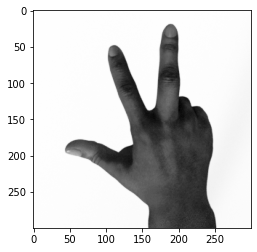

In [32]:
image= train_images[0].reshape(300,300)

plt.imshow(image, cmap='Greys_r')

(300, 300, 3)

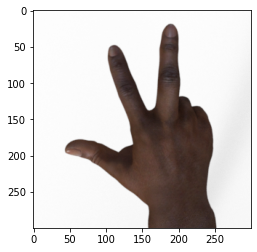

In [34]:
rgb_images= np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image= rgb_images[0]

plt.imshow(rgb_image)

rgb_image.shape

## Convert PNG/JPG to numPY format

In [35]:
import imageio

<class 'imageio.core.util.Array'>


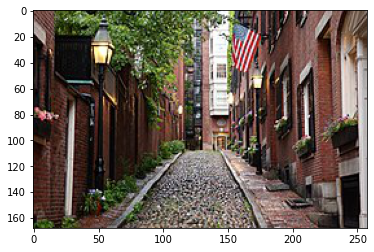

In [38]:
im= imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/ISH_WC_Boston4.jpg/258px-ISH_WC_Boston4.jpg')

plt.imshow(im)

print(type(im))       # now we want to convert this into numPY.

In [39]:
# Conversion:

im_np= np.asarray(im)
print(im_np.shape)

(168, 258, 3)
